  
<span style="font-size: 250%;color:white;background:red"> ZARZĄDZANIE ZASOBAMI LUDZKIMI

<span style="font-size: 160%;color:#0000ff"> OCENA WYDAJNOŚCI PRACY PRACOWNIKÓW ZA POMOCĄ METODY DEA

<span style="font-size: 150%;color:white;background:#1155cc"> Data envelopment analysis (DEA)
    
Envelopment analiza danych (DEA), czasami nazywany analiza granica została po raz pierwszy przedstawiona przez Charnes, Cooper i Rodos w roku 1978. Jest to technika pomiaru wydajności, które, jak się przekonamy, może być stosowany do oceny względnej skuteczności w procesie decyzyjnym jednostek ( DMU ) w organizacjach. W tym przypadku DMU jest odrębną jednostką w organizacji, która ma elastyczność w odniesieniu do niektórych decyzji, które podejmuje, ale niekoniecznie pełną swobodę w odniesieniu do tych decyzji.

Przykładami takich jednostek, do których zastosowano DEA, są: banki, posterunki policji, szpitale, urzędy skarbowe, więzienia, bazy obronne (wojsko, marynarka wojenna, siły powietrzne), szkoły i wydziały uniwersyteckie. Należy zauważyć, że jedną z zalet DEA jest to, że można go zastosować do organizacji non-profit.

Od czasu pierwszego zaproponowania tej techniki wykonano wiele prac teoretycznych i empirycznych. Opublikowano wiele badań dotyczących stosowania DEA w rzeczywistych sytuacjach. Oczywiście niepublikowanych opracowań jest znacznie więcej, np. Wykonanych wewnętrznie przez firmy lub konsultantów zewnętrznych.

Na początku zilustrujemy DEA na małym przykładzie. Więcej o DEA można znaleźć tutaj . Zwróć uwagę, że wiele z tego, co zobaczysz poniżej, to graficzne (obrazowe) podejście do DEA. Jest to bardzo przydatne, jeśli próbujesz wyjaśnić DEA osobom mniej wykwalifikowanym technicznie (takim jak wielu, których możesz spotkać w świecie zarządzania). Istnieje jednak matematyczne podejście do DEA, które można jednak przyjąć - zostanie to zilustrowane poniżej.

http://people.brunel.ac.uk/~mastjjb/jeb/or/dea.html

Zadanie polega na tym, że analizuje się wydajność personelu pracującego w banku, wymyślono różne wskaźniki m.in. wskażnik ilości operacji bankowych na pracownika itp. 

<span style="font-size: 130%;color:#0000ff"> Jednym z problemów związanych z porównaniem za pomocą współczynników jest to, że różne współczynniki mogą dać inny obraz i trudno jest połączyć cały zestaw współczynników w jedną ocenę liczbową.
    
Na przykład rozważmy Dorking i Reigate - Dorking jest (2,75 / 2,09) = 1,32 razy skuteczniejszy niż Reigate w transakcjach osobistych, ale tylko (1,25 / 1,09) = 1,15 razy skuteczniejszy w transakcjach biznesowych. Jak połączyć te liczby w jedą ocenę?
Problem zacznie się gdy takich wskaźników dodamy jeszcze 5 czy 8. Jak wtedy ocenić? Przez średnią? 

<span style="font-size: 130%;color:#0000ff"> Graficznie w artykule mu wyszedł taki ranking:

 1. Croydon 100%
 2. Dorking 43%
 3. Redhill 100%
 4. Reigate 36%

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Vigot" ,"BioBat","Synergia","Kurpas","Felicja", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+-----------+-------+--------+----------+--------+---------+-------------------+
| Projekty  | Vigot | BioBat | Synergia | Kurpas | Felicja | Liczba serwisantó |
|    IT     |       |        |          |        |         |         w         |
+-----------+-------+--------+----------+--------+---------+-------------------+
| HelpDesk  | 1285  |  1053  |   1380   |  1560  |   219   |        12         |
|     A     |       |        |          |        |         |                   |
+-----------+-------+--------+----------+--------+---------+-------------------+
| HelpDesk  |  985  |  681   |   1028   |  796   |   320   |         8         |
|     B     |       |        |          |        |         |                   |
+-----------+-------+--------+----------+--------+---------+-------------------+
| HelpDesk  |  838  |  755   |   1100   |  125   |   261   |        10         |
|     C     |       |        |          |        |         |                   |
+-----------+-------+-------


Zarząd uznał że:

obszar Wrocławia (x4) jest cztery razy lepiej punktowany niż obaszar Łodzi (x1)


<span style="font-size: 100%;color:green">
Obsługa Synergia(x3) trwa dwa razy dłużej niż Vigot(x1): 
<span style="font-size: 100%;color:blue">
$ {x_{3}}-2{x_{1}} >= 0$     
</span> <br />







<span style="font-size: 100%;color:green">
Obsługa Synergia(x3) trwa dwa razy dłużej niż BioBat(x2):     
<span style="font-size: 100%;color:blue">    
$ {x_{3}}-2{x_{2}} >= 0$ <br />

<span style="font-size: 100%;color:green">
Obsługa Synergia(x3) trwa cztery razy dłużej niż Kurpas(x4):    
<span style="font-size: 100%;color:blue"> 
$ {x_{3}}-4{x_{4}} >= 0$ <br />

<span style="font-size: 100%;color:green">
Obsługa Synergia(x3) trwa osiem razy dłużej niż Felicja(x5):  
<span style="font-size: 100%;color:blue"> 
$ {x_{3}}-8{x_{5}} >= 0$ <br />

In [ ]:
prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0

In [2]:
F = 2
G = 8
N = 4

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> HelpDesk A

In [3]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_A",LpMaximize)

In [4]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [5]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {1285x_{1}} + 1053x_{2}+ 1380x_{3}+ 1560x_{4}+ 219x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$12x_{6}=1$

In [6]:
# objective function
prob += 185*x1 + 153*x2+118*x3+56*x4, "Maksymalizacja"

In [7]:
print(prob)

DEA_HelpDesk_A:
MAXIMIZE
185*x1 + 153*x2 + 118*x3 + 56*x4 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous



In [8]:
from beautifultable import BeautifulTable

from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{5}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{10x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{5} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-10x_{5} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{12x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

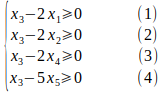

In [9]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-10*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0


prob += 12*x6 == 1

In [10]:
print(prob)

DEA_HelpDesk_A:
MAXIMIZE
185*x1 + 153*x2 + 118*x3 + 56*x4 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 10 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 12 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [11]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [12]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 1/5583
x2 = 1/5583
x3 = 2/5583
x4 = 0
x5 = 0
x6 = 1/12


In [13]:
x1 = 1/5583
x2 = 1/5583
x3 = 2/5583
x4 = 0
x5 = 0
x6 = 1/12




FUNKCJA CELU HELPDESK_A

##### $
\left\{
\begin{align} 
{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5} &\to max &(18)\\
{12x_{6}}=1&& (19)
\end{align}
\right. 
$

In [14]:
A = (1285*x1+1053*x2+1380*x3+1560*x4+219*x5)/(12*x6)
A

0.9131291420383306

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> HelpDesk B

In [15]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_B",LpMaximize)

In [16]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [17]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ 985x_{1} + 681x_{2}+ 1028x_{3}+ 796x_{4}+ 320x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$8x_{6}=1$

In [18]:
# objective function
prob += 985*x1 + 681*x2+1028*x3+796*x4+320*x5, "Maksymalizacja"

In [19]:
print(prob)

DEA_HelpDesk_B:
MAXIMIZE
985*x1 + 681*x2 + 1028*x3 + 796*x4 + 320*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [20]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{6}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{10x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{6} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-10x_{6} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{8x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

In [21]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-10*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0

prob += 8*x6 == 1

In [22]:
print(prob)

DEA_HelpDesk_B:
MAXIMIZE
985*x1 + 681*x2 + 1028*x3 + 796*x4 + 320*x5 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 10 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 8 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [23]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [24]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 1/4200
x2 = 1/4200
x3 = 1/2100
x4 = 1/8400
x5 = 1/16800
x6 = 1/8


In [25]:
x1 = 1/4200
x2 = 1/4200
x3 = 1/2100
x4 = 1/8400
x5 = 1/16800
x6 = 1/8



<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {985x_{1}} + 681x_{2}+ 1028x_{3}+ 796x_{4}+ 320x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$8x_{6}=1$

In [26]:
B = (985*x1+681*x2+1028*x3+796*x4+320*x5)/(8*x6)
B

1.0

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> HelpDesk C

In [27]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_C",LpMaximize)

In [28]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [29]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ 838x_{1} + 755x_{2}+ 1100x_{3}+ 125x_{4}+ 261x_{5} \to max$

przy warunku, że dla HelpDesk_C:

<span style="font-size: 130%;color:black">$10x_{6}=1$

In [30]:
# objective function
prob += 838*x1 + 755*x2+1100*x3+125*x4+261*x5, "Maksymalizacja"

In [31]:
print(prob)

DEA_HelpDesk_C:
MAXIMIZE
838*x1 + 755*x2 + 1100*x3 + 125*x4 + 261*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [32]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{5}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{10x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{5} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-10x_{5} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{10x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

In [33]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-10*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0

prob += 10*x6 == 1

In [34]:
print(prob)

DEA_HelpDesk_C:
MAXIMIZE
838*x1 + 755*x2 + 1100*x3 + 125*x4 + 261*x5 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 10 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 10 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [35]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [36]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 4/13685
x3 = 8/13685
x4 = 0
x5 = 0
x6 = 1/10


In [37]:
x1 = 0
x2 = 4/13685
x3 = 8/13685
x4 = 0
x5 = 0
x6 = 1/10


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {838x_{1}} + 755x_{2}+ 1100x_{3}+ 125x_{4}+ 261x_{5} \to max$

przy warunku, że dla HelpDesk_C:

<span style="font-size: 130%;color:black">$10x_{6}=1$

In [38]:
C = (838*x1+755*x2+1100*x3+125*x4+261*x5)/(10*x6)
C

0.8637194008037997

Ocena Łomży jest 0.7189

In [39]:

print("HelpDesk A:", round(A, 3))
print("HelpDesk B:", round(B, 3))
print("HelpDesk C:", round(C, 3))

HelpDesk A: 0.913
HelpDesk B: 1.0
HelpDesk C: 0.864


# Zmniejszenie zatrudnienia w oddziale C

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:red"> HelpDesk A

In [40]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_A",LpMaximize)

In [41]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [42]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,9 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |         9         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {1285x_{1}} + 1053x_{2}+ 1380x_{3}+ 1560x_{4}+ 219x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$12x_{6}=1$

In [43]:
# objective function
prob += 185*x1 + 153*x2+118*x3+56*x4, "Maksymalizacja"

In [44]:
print(prob)

DEA_HelpDesk_A:
MAXIMIZE
185*x1 + 153*x2 + 118*x3 + 56*x4 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous



In [45]:
from beautifultable import BeautifulTable

from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{5}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{9x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{5} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-9x_{5} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{12x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

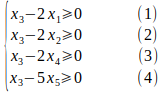

In [46]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-9*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0


prob += 12*x6 == 1

In [47]:
print(prob)

DEA_HelpDesk_A:
MAXIMIZE
185*x1 + 153*x2 + 118*x3 + 56*x4 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 9 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 12 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [48]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [49]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 1/5583
x2 = 1/5583
x3 = 2/5583
x4 = 0
x5 = 0
x6 = 1/12


In [50]:
x1 = 1/5583
x2 = 1/5583
x3 = 2/5583
x4 = 0
x5 = 0
x6 = 1/12




FUNKCJA CELU HELPDESK_A

##### $
\left\{
\begin{align} 
{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5} &\to max &(18)\\
{12x_{6}}=1&& (19)
\end{align}
\right. 
$

In [51]:
A = (1285*x1+1053*x2+1380*x3+1560*x4+219*x5)/(12*x6)
A

0.9131291420383306

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> HelpDesk B

In [52]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_B",LpMaximize)

In [53]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [54]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ 985x_{1} + 681x_{2}+ 1028x_{3}+ 796x_{4}+ 320x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$8x_{6}=1$

In [55]:
# objective function
prob += 985*x1 + 681*x2+1028*x3+796*x4+320*x5, "Maksymalizacja"

In [56]:
print(prob)

DEA_HelpDesk_B:
MAXIMIZE
985*x1 + 681*x2 + 1028*x3 + 796*x4 + 320*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [57]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{5}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{10x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{5} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-10x_{5} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{8x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

In [58]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-9*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0

prob += 8*x6 == 1

In [59]:
print(prob)

DEA_HelpDesk_B:
MAXIMIZE
985*x1 + 681*x2 + 1028*x3 + 796*x4 + 320*x5 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 9 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 8 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [60]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [61]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 1/4200
x2 = 1/4200
x3 = 1/2100
x4 = 1/8400
x5 = 1/16800
x6 = 1/8


In [62]:
x1 = 1/4200
x2 = 1/4200
x3 = 1/2100
x4 = 1/8400
x5 = 1/16800
x6 = 1/8




<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {985x_{1}} + 681x_{2}+ 1028x_{3}+ 796x_{4}+ 320x_{5} \to max$

przy warunku, że dla HelpDesk_A:

<span style="font-size: 130%;color:black">$8x_{6}=1$

In [63]:
B = (985*x1+681*x2+1028*x3+796*x4+320*x5)/(8*x6)
B

1.0

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> HelpDesk C

In [64]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_HelpDesk_C",LpMaximize)

In [65]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [66]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ 838x_{1} + 755x_{2}+ 1100x_{3}+ 125x_{4}+ 261x_{5} \to max$

przy warunku, że dla HelpDesk_C:

<span style="font-size: 130%;color:black">$10x_{6}=1$

In [67]:
# objective function
prob += 838*x1 + 755*x2+1100*x3+125*x4+261*x5, "Maksymalizacja"

In [68]:
print(prob)

DEA_HelpDesk_C:
MAXIMIZE
838*x1 + 755*x2 + 1100*x3 + 125*x4 + 261*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [69]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Projekty IT","Łódź" ,"Poznań","Warszawa","Wrocław","Kraków", "Liczba serwisantów" ]
table.append_row(["HelpDesk A",    1285, 1053, 1380, 1560, 219,12 ])
table.append_row(["HelpDesk B",    985,   681, 1028, 796, 320,8 ])
table.append_row(["HelpDesk C",    838,   755, 1100, 125, 261,10 ])
print(table)

+------------+------+--------+----------+---------+--------+-------------------+
| Projekty I | Łódź | Poznań | Warszawa | Wrocław | Kraków | Liczba serwisantó |
|     T      |      |        |          |         |        |         w         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk A | 1285 |  1053  |   1380   |  1560   |  219   |        12         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk B | 985  |  681   |   1028   |   796   |  320   |         8         |
+------------+------+--------+----------+---------+--------+-------------------+
| HelpDesk C | 838  |  755   |   1100   |   125   |  261   |        10         |
+------------+------+--------+----------+---------+--------+-------------------+


##### $
\left\{
\begin{align} 
y_{A} = \frac{{1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5}}{12x_{6}}&&(1)\\
y_{B} = \frac{{985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5}}{8x_{5}} & & (2)\\
y_{C} = \frac{{838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5}}{10x_{6}} & & (3)\\
\end{align}
\right. 
$

##### $
\left\{
\begin{align} 
({1285x_{1}} + 1053x_{2}+ 1380x_{3}+1560x_{4}+219x_{5})-12x_{6} & \leqslant 0& (6)\\
({985x_{1}} + 681x_{2}+1028x_{3}+796x_{4}+320x_{5})-8x_{5} & \leqslant 0& (7)\\
({838x_{1}} + 755x_{2}+1100x_{3}+125x_{4}+261x_{5})-10x_{5} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki dodatkowe: 
##### $
\left\{
\begin{align} 
{x_{4}}-4{x_{1}} >= 0 & \geqslant 0& (17)\\
\end{align}
\right. 
$


Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{10x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

In [70]:
# main constraints
prob += (1285*x1+1052*x2+1380*x3+1560*x4+219*x5)-12*x6 <= 0
prob += (985*x1+681*x2+1028*x3+796*x4+320*x5)-8*x6 <= 0
prob += (838*x1+755*x2+1100*x3+125*x4+261*x5)-9*x6 <= 0

prob += x3-F*x1 >= 0
prob += x3-F*x2 >= 0
prob += x3-N*x4 >= 0
prob += x3-G*x5 >= 0

prob += 10*x6 == 1

In [71]:
print(prob)

DEA_HelpDesk_C:
MAXIMIZE
838*x1 + 755*x2 + 1100*x3 + 125*x4 + 261*x5 + 0
SUBJECT TO
_C1: 1285 x1 + 1052 x2 + 1380 x3 + 1560 x4 + 219 x5 - 12 x6 <= 0

_C2: 985 x1 + 681 x2 + 1028 x3 + 796 x4 + 320 x5 - 8 x6 <= 0

_C3: 838 x1 + 755 x2 + 1100 x3 + 125 x4 + 261 x5 - 9 x6 <= 0

_C4: - 2 x1 + x3 >= 0

_C5: - 2 x2 + x3 >= 0

_C6: x3 - 4 x4 >= 0

_C7: x3 - 8 x5 >= 0

_C8: 10 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [72]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [73]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 4/13685
x3 = 8/13685
x4 = 0
x5 = 0
x6 = 1/10


In [74]:
x1 = 0
x2 = 4/13685
x3 = 8/13685
x4 = 0
x5 = 0
x6 = 1/10

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {838x_{1}} + 755x_{2}+ 1100x_{3}+ 125x_{4}+ 261x_{5} \to max$

przy warunku, że dla HelpDesk_C:

<span style="font-size: 130%;color:black">$10x_{6}=1$

In [75]:
C = (838*x1+755*x2+1100*x3+125*x4+261*x5)/(9*x6)
C

0.959688223115333

Ocena Łomży jest 0.7189

In [76]:

print("HelpDesk A:", round(A, 3))
print("HelpDesk B:", round(B, 3))
print("HelpDesk C:", round(C, 3))

HelpDesk A: 0.913
HelpDesk B: 1.0
HelpDesk C: 0.96
